TensorFlow

TensorFlow is an open-source software library for numerical computation, particularly well-suited and fine-tuned for large-scale Machine Learning (ML) and Deep Learning (DL) tasks. Its primary use is in developing and training artificial neural networks, particularly deep neural networks. TensorFlow allows developers to easily implement popular DL architectures such as Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), and Autoencoders. TensorFlow provides an extensive set of tools for building and training neural networks, making it a popular choice for image classification tasks.

OpenCV

OpenCV (Open Source Computer Vision Library) is a library of programming functions mainly aimed at real-time computer vision. It provides a wide range of functionalities for image and video processing, feature detection, object detection, and more. OpenCV is often used in conjunction with deep learning libraries like TensorFlow, Keras, or PyTorch for image classification tasks. It provides a set of pre-trained models and tools for image processing, making it a popular choice for computer vision tasks.

In [1]:
#basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Tensorflow pacakeges
import tensorflow as tf

In [3]:
# load dataset 

train_data_path = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/PlayersDashboard/Image_classification_python/players_image/Test_dataset"
test_data_path  = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/PlayersDashboard/Image_classification_python/players_image/Train_dataset"
valid_data_path = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/PlayersDashboard/Image_classification_python/players_image/Valid_dataset"

In [4]:
#image size arrange

image_width = 180
image_hieght= 180

- tf.keras.utils.image_dataset_from_directory: 

This is a utility function provided by TensorFlow's Keras API to load image data from a directory. It automatically labels the images based on the directory structure.

- train_data_path: 

This is the path to the directory containing the training dataset. The directory should have subdirectories for each class, and the images should be placed in the corresponding subdirectories.

- shuffle=True: 

This parameter indicates whether to shuffle the dataset before loading it. Shuffling is useful to ensure that the data is well-mixed and not biased towards any particular class.

- image_size=(image_hieght,image_width): 

This parameter specifies the size of the images to be loaded. It's important to resize the images to a consistent size before feeding them into a deep learning model.

- batch_size=32: 

This parameter specifies the number of images to be loaded in each batch. A batch is a subset of the dataset used for training the model. Using a batch size of 32 is a common practice in deep learning.

- validation_split=False: 

This parameter specifies whether to split the dataset into training and validation sets. If set to True, a validation set will be created by randomly selecting a portion of the data (by default, 20%). In this case, the parameter is set to False, indicating that the entire dataset will be used for training.

In [5]:
#load data_file train dataset


data_train =tf.keras.utils.image_dataset_from_directory(train_data_path,
                                                        shuffle=True,
                                                        image_size=(image_hieght,image_width),
                                                        batch_size=32,
                                                        validation_split=False)

Found 341 files belonging to 5 classes.


In [6]:
# show the class names

data_cate = data_train.class_names

In [7]:
#load data_file test dataset


data_test =tf.keras.utils.image_dataset_from_directory(test_data_path,
                                                        shuffle=True,
                                                        image_size=(image_hieght,image_width),
                                                        batch_size=32,
                                                        validation_split=False)

Found 341 files belonging to 5 classes.


In [9]:
#load data_file validation dataset


data_valida =tf.keras.utils.image_dataset_from_directory(valid_data_path,
                                                    
                                                        image_size=(image_hieght,image_width),
                                                        batch_size=32,
                                                        )

Found 341 files belonging to 5 classes.


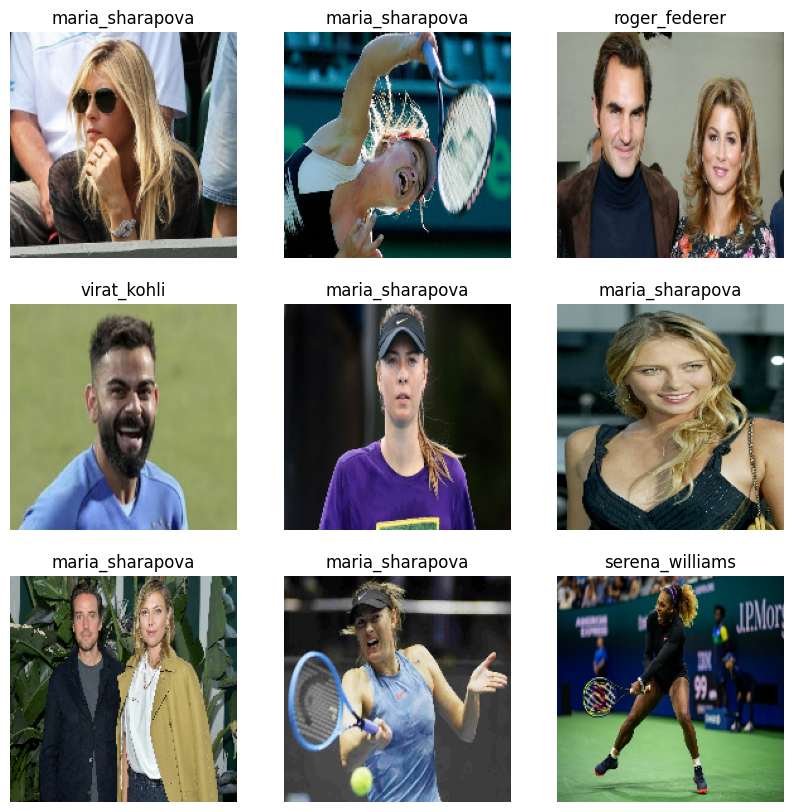

In [10]:
#show the dataset in graphical

plt.figure(figsize=(10,10))
for img,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(data_cate[label[i]])
        plt.axis('off')

tensorflow.keras.layers in deep learning for image classification.

- tensorflow.keras.models is a module in TensorFlow Keras that provides a way to build and train deep learning models. 
- The Sequential class in this module is commonly used for building image classification models.

- we're creating a convolutional neural network (CNN) for image classification. We start by creating a Sequential model, and then add layers to it. The Conv2D layer is a convolutional layer that applies a convolution operation to the input image. 
- The MaxPooling2D layer is a pooling layer that downsamples the input feature map by taking the maximum value in each patch. 
- The Dropout layer is a regularization layer that randomly drops out a fraction of the input units during training to prevent overfitting. 
- The Flatten layer is a layer that flattens the input tensor into a 1D tensor. 
- The Dense layer is a fully connected layer that connects every neuron in the previous layer to every neuron in the current layer.

- tensorflow.keras.layers is a module in TensorFlow Keras that provides a variety of layers that can be used to build deep learning models. 
- This module also provides other layers such as BatchNormalization, GlobalAveragePooling2D, and LeakyReLU

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers

In [12]:
# model create

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cate))
])

In [13]:
# model compile

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
#model fit and train

epochs_size =10
history = model.fit(data_train,validation_data=data_valida,epochs=epochs_size)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - accuracy: 0.2951 - loss: 2.5099 - val_accuracy: 0.4047 - val_loss: 1.5137
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.3867 - loss: 1.4736 - val_accuracy: 0.4868 - val_loss: 1.1994
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.5554 - loss: 1.1643 - val_accuracy: 0.7155 - val_loss: 0.8767
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.7125 - loss: 0.8336 - val_accuracy: 0.7507 - val_loss: 0.6782
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.7960 - loss: 0.5663 - val_accuracy: 0.8886 - val_loss: 0.3769
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.9100 - loss: 0.3205 - val_accuracy: 0.9589 - val_loss: 0.2182
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.9585 - loss: 0.1908 - val_accuracy: 0.9824 - val_loss: 0.0974
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.9681 - loss: 0.1050 - val_accuracy: 1.

In [33]:
# Test image 

image = 'image_test_samples/sharapova_1.jpg'
image = tf.keras.utils.load_img(image,target_size=(image_hieght,image_width))
image_array = tf.keras.utils.array_to_img(image)
image_batch = tf.expand_dims(image_array,0)

In [34]:
# Predict the class
predictions = model.predict(image_batch)
# Since `from_logits=True` was used, we need to apply softmax
predicted_probabilities = tf.nn.softmax(predictions[0]).numpy()
# Get the index of the highest probability
predicted_class = np.argmax(predicted_probabilities)

# Map the class index to the class name
class_names = data_cate
predicted_class_name = class_names[predicted_class]
# Print the predicted class
print(f'Predicted class: {predicted_class}')
# Assume `data_cate` contains your class names
print(f'Predicted class name : {predicted_class_name}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: 4
Predicted class name : virat_kohli


In [17]:

# Function to preprocess the image and make a prediction
def predict_image(model, img_path):
    # Load the image
    img = tf.keras.utils.load_img(img_path, target_size=(image_hieght,image_width))  # Replace height and width with your model's input size

    img_array = tf.keras.utils.array_to_img(img)

    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)

    predicted_probabilities = tf.nn.softmax(predictions[0]).numpy()

    predicted_class = np.argmax(predicted_probabilities)
    
    return predicted_class, predicted_probabilities

# Define the path to the image
img_path = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/PlayersDashboard/Image_classification_python/sharapova_1.jpg"

# Predict the class of the image
predicted_class, predicted_probabilities = predict_image(model, img_path)

# Print the predicted class and probabilities
print(f'Predicted class: {predicted_class}')
print(f'Predicted probabilities: {predicted_probabilities}')


1/1 [==============================] - 0s 102ms/step
Predicted class: 3
Predicted probabilities: [0.21789794 0.2098882  0.16844237 0.26057714 0.14319435]


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the image and make a prediction
def predict_image(model, img_path, class_names):
    # Load the image
    img = tf.keras.utils.load_img(img_path, target_size=(image_hieght,image_width))  # Replace height and width with your model's input size
    
    # Convert the image to a numpy array
    img_array = tf.keras.utils.array_to_img(img)

    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    predictions = model.predict(img_array)
    
    # Apply softmax to the logits
    predicted_probabilities = tf.nn.softmax(predictions[0]).numpy()
    
    # Get the index of the highest probability
    predicted_class_index = np.argmax(predicted_probabilities)
    
    # Map the class index to the class name
    predicted_class_name = class_names[predicted_class_index]
    
    return predicted_class_name, predicted_probabilities

# Define the path to the image
img_path = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/PlayersDashboard/Image_classification_python/sharapova_1.jpg"

# Assume `data_cate` contains your class names
class_names = data_cate

# Predict the class of the image
predicted_class_name, predicted_probabilities = predict_image(model, img_path, class_names)

# Print the predicted class name and probabilities
print(f'Predicted class name: {predicted_class_name}')
print(f'Predicted probabilities: {predicted_probabilities}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class name: virat_kohli
Predicted probabilities: [0.00285744 0.05590162 0.01100411 0.01703395 0.91320294]


In [31]:
prediction = model.predict(image_batch)
score = tf.nn.softmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [32]:
val_loss, val_accuracy = model.evaluate(data_valida)
print("Validation Accuracy:", val_accuracy)
print("Player {} with accuracy score of {:0.2f}".format(data_cate[np.argmax(score)],np.max(score*100)))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9737 - loss: 0.0665
Validation Accuracy: 0.9794721603393555
Player virat_kohli with accuracy score of 91.32


In [ ]:
# model.save('image_cls_players')

In [35]:
import pickle

In [37]:
pickle.dump(model,open('image_cls_ply.joblib','wb'))